# Полиномиальные модели

## Из методички

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Парная регрессия**

Парная регрессия - частный случай линейной регрессии, когда зависимая переменная y предсказывается только по одной независимой переменной х. Парная регрессия используется для выявления связи между двумя переменными.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [ ]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:
X = data.x
y = data.y

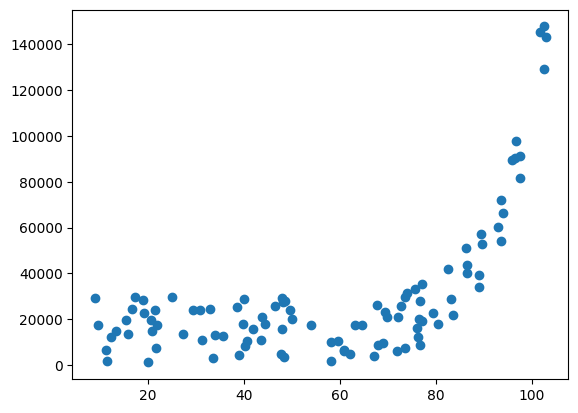

In [ ]:
plt.scatter(X, y)

Видно наличие нелинейной зависимости между атрибутом и целевой переменной. Так как не знаем функцию, то строим полиномы разных степеней и оцениваем точность.

In [ ]:
X = pd.DataFrame(X) # у нас изначально Х Series, sklearn предполагает, что он DataFrame

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


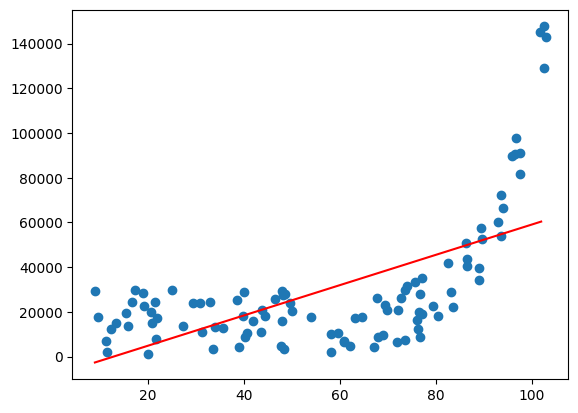

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [ ]:
linear.score(X, y) # кэффициент детерминации низкий

0.37467360318911636

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation = PolynomialFeatures(degree=2)

In [ ]:
transformation.fit(X)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)

In [ ]:
X_2.shape # первая колонка - автоматически добавляемые единицы
          # вторая колонка - исходный х
          # третья колонка - полиномиальный признак х^2
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)


In [ ]:
xx_2d = transformation.transform(pd.DataFrame(xx))  # PolynomialFeatures был обучен на данных с именами
# признаков (Х был DataFrame), после трансформации без имен столбцом (стал numpy array). Не влияет на обучение модели.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


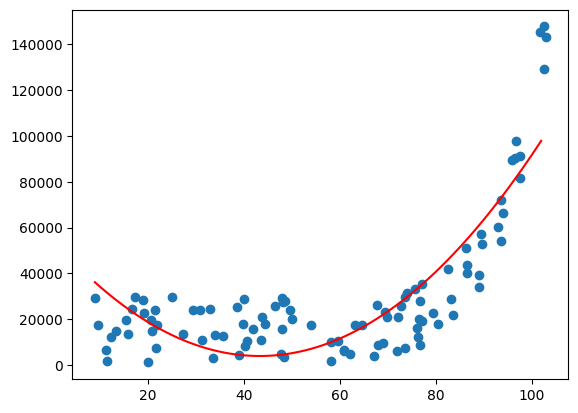

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

Коэффициент детерминации полиномиальной модели второго порядка значительно выше линейной модели, кривая второго порядка лучше аппроксимирует данные.

**Классификация**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

In [ ]:
y = data.y # целевая переменная
X = data.drop(["y"], axis=1) # атрибуты

В целевой переменной содержится два значения, значит задача бинарной классификации.

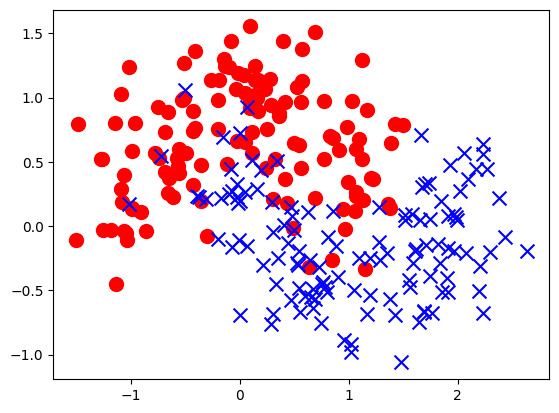

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Датасет линейно неразделим, значит необходима полиномиальная модель.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

<ipython-input-528-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-528-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


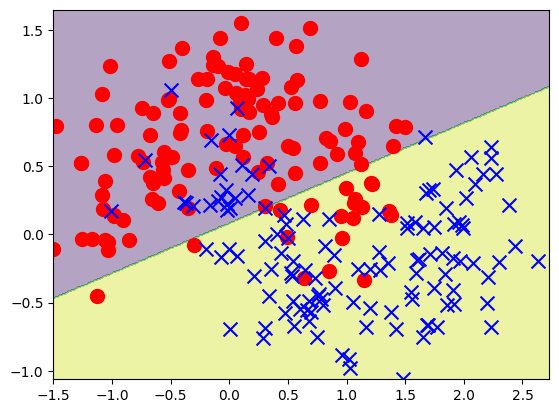

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
logistic.score(X, y)

0.832

Для построения нелинейной модели создадим объект преобразования и обучим его на матрице атрибутов.

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False) # исключая столбец единиц (итак есть intercept)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

Кол-во столбцов определяется числом возможных полиномиальных комбинаций исходных признаков до третьей степени (x1, x2 - исходные признаки; x1^2, x2^2, x1x2 - квадратичные признаки; x1^3, x2^3, x1^2x2, x1x2^2 - кубические  признаки). Итого это дает 9 столбцов.

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


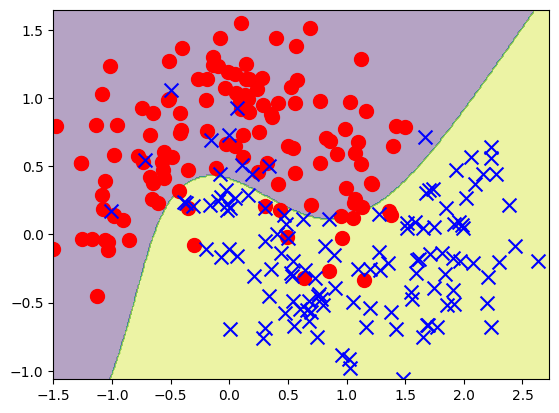

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

Введение полиномиальных признаков также повышает качество модели бинарной классификации.

**Регрессия на реальных данных**

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price # столбец с ценой - целевая переменная
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1) # исключаем также дату и идентификатор

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109161

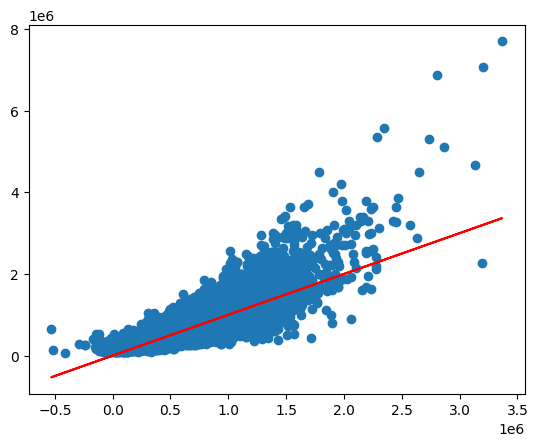

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r') # изображается только целевая переменная

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8326020796539212

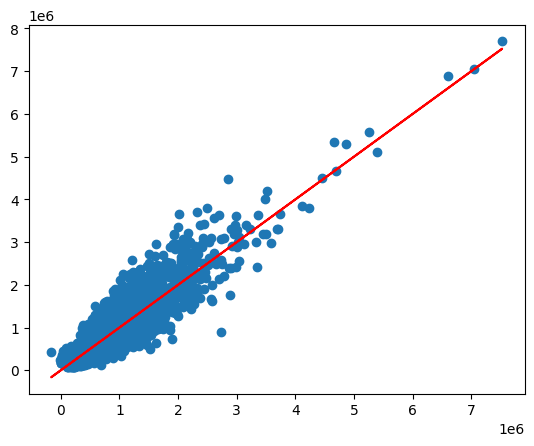

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Точки ближе к прямой, модель значительно улучшилась.

## Задания для самостоятельного выполнения

*1. В выполненной работе добавьте замер времени обучения каждой модели.*

In [ ]:
import time


start_time = time.time()
linear = LinearRegression().fit(X, y) # линейная регрессия
end_time = time.time()
print(f"Линейная модель: {end_time - start_time:.4f} секунд")


transformation = PolynomialFeatures(degree=2) # полиномиальная регрессия 2 степени
X_2 = transformation.fit_transform(X)
start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
end_time = time.time()
print(f"Полиномиальная модель 2 степени: {end_time - start_time:.4f} секунд")


start_time = time.time()
logistic = LogisticRegression().fit(X, y) # логистическая регрессия
end_time = time.time()
print(f"Логистическая регрессия: {end_time - start_time:.4f} секунд")


class_transform = PolynomialFeatures(degree=3, include_bias=False) # полиномиальная классификация 3 степени
X_3 = class_transform.fit_transform(X)
start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
end_time = time.time()
print(f"Полиномиальная классификация 3 степени: {end_time - start_time:.4f} секунд")


start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices) # линейная регрессия (цены домов)
end_time = time.time()
print(f"Линейная регрессия (цены домов): {end_time - start_time:.4f} секунд")


X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices) # полиномиальная регрессия 3 степени (цены домов)
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()
print(f"Полиномиальная регрессия 3 степени (цены домов): {end_time - start_time:.4f} секунд")


Линейная модель: 0.0051 секунд
Полиномиальная модель 2 степени: 0.0015 секунд
Логистическая регрессия: 0.0045 секунд
Полиномиальная классификация 3 степени: 0.0044 секунд
Линейная регрессия (цены домов): 0.0130 секунд
Полиномиальная регрессия 3 степени (цены домов): 6.6214 секунд


*2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.*

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
X = data.x
y = data.y

X = pd.DataFrame(X)


transformation = PolynomialFeatures(degree=5) # полиномиальная модель 5 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 5")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")
print()


transformation = PolynomialFeatures(degree=10) # полиномиальная модель 10 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 10")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")
print()

transformation = PolynomialFeatures(degree=100) # полиномиальная модель 100 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 100")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")


Порядок полинома: 5
Время обучения: 0.0051 секунд
Коэффициент детерминации: 0.9217

Порядок полинома: 10
Время обучения: 0.0048 секунд
Коэффициент детерминации: 0.9222

Порядок полинома: 100
Время обучения: 0.3759 секунд
Коэффициент детерминации: 0.7925


Время обучения моделей с полиномами разных степеней отличается незначительно.

Модели с полиномами 5 и 10 степени дают хорошее значение точности с небольшим улучшением. Модель с полиномом 100 степени показывает значительное ухудшение (переобучение).

*3. То же самое проделайте с датасетом для классификации и "King county".*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# классификация
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv")

X = data.drop(columns="y")
y = data["y"]

# полиномиальная модель 5 степени
transformation = PolynomialFeatures(degree=5)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 5")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")
print()

# полиномиальная модель 10 степени
transformation = PolynomialFeatures(degree=10)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 10")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")
print()

# полиномиальная модель 100 степени
transformation = PolynomialFeatures(degree=100)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 100")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Порядок полинома: 5
Время обучения: 3.9406 секунд
Точность: 0.8400

Порядок полинома: 10
Время обучения: 7.3328 секунд
Точность: 0.8240



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Порядок полинома: 100
Время обучения: 12.3397 секунд
Точность: 0.5000


Предупреждение указывает на то, что алгоритм не смог найти решение в заданное количество итераций.

In [ ]:
# from sklearn.metrics import mean_squared_error

# data_kc = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# y_kc = data_kc["price"]
# X_kc = data_kc.drop(columns=["id", "date", "price"])

# # Полиномиальная модель 5 степени
# transformation = PolynomialFeatures(degree=5)
# start_time = time.time()
# X_poly = transformation.fit_transform(X_kc)

# model = LinearRegression().fit(X_poly, y_kc)
# end_time = time.time()

# mse = mean_squared_error(y_kc, model.predict(X_poly))

# print(f"Порядок полинома: 5")
# print(f"Время обучения: {end_time - start_time:.4f} секунд")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
# print()

# # Полиномиальная модель 10-й степени
# transformation = PolynomialFeatures(degree=10)
# start_time = time.time()
# X_poly = transformation.fit_transform(X_kc)

# model = LinearRegression().fit(X_poly, y_kc)
# end_time = time.time()

# mse = mean_squared_error(y_kc, model.predict(X_poly))

# print(f"Порядок полинома: 10")
# print(f"Время обучения: {end_time - start_time:.4f} секунд")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
# print()

# # Полиномиальная модель 100-й степени
# transformation = PolynomialFeatures(degree=100)
# start_time = time.time()
# X_poly = transformation.fit_transform(X_kc)

# model = LinearRegression().fit(X_poly, y_kc)
# end_time = time.time()

# mse = mean_squared_error(y_kc, model.predict(X_poly))

# print(f"Порядок полинома: 100")
# print(f"Время обучения: {end_time - start_time:.4f} секунд")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")


*4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.*

*5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.*

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices["price"]
X_kc_prices = data_kc_prices.drop(columns=["id", "date", "price"])

model = LinearRegression()
model.fit(X_kc_prices, y_kc_prices)

coefficients = model.coef_
feature_names = X_kc_prices.columns

coef_df = pd.DataFrame({"Признак": feature_names, "Коэффициент": coefficients})

# сортировка по модулю коэффициента (чтобы увидеть важнейшие признаки)
coef_df["|Коэффициент|"] = coef_df["Коэффициент"].abs()
coef_df = coef_df.sort_values(by="|Коэффициент|", ascending=False).drop(columns=["|Коэффициент|"])

print(coef_df)


          Признак    Коэффициент
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598


*6. Попробуйте также проинтерпретировать полиномиальную модель.*

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# # Загрузка данных
# data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# # Выделяем целевой признак и предикторы
# y_kc_prices = data_kc_prices["price"]
# X_kc_prices = data_kc_prices.drop(columns=["id", "date", "price"])

# # Преобразование признаков в полиномиальные (5-й степени)
# degree = 5
# poly = PolynomialFeatures(degree=degree, include_bias=False)
# X_poly = poly.fit_transform(X_kc_prices)
# feature_names = poly.get_feature_names_out(X_kc_prices.columns)

# # Обучение модели
# model = LinearRegression()
# model.fit(X_poly, y_kc_prices)

# # Получение коэффициентов
# coefficients = model.coef_

# # Создание таблицы с коэффициентами
# coef_df = pd.DataFrame({"Признак": feature_names, "Коэффициент": coefficients})

# # Сортировка по абсолютному значению коэффициента (чтобы увидеть важнейшие признаки)
# coef_df["|Коэффициент|"] = coef_df["Коэффициент"].abs()
# coef_df = coef_df.sort_values(by="|Коэффициент|", ascending=False).drop(columns=["|Коэффициент|"])

# # Вывод первых 20 значимых коэффициентов
# print(coef_df.head(20))


# Метод опорных векторов

Метод опорных векторов SVM - алгоритм машинного обучения, используемый для решения задач классификации, регрессии и обнаружения выбросов.

Случай линейно разделимых классов - ищет разделяющую гиперплоскость, максимально отдаленную от обоих классов.

Случай линейно неразделимых классов - вводятся доп переменные, характеризующие допустимые ошибку классификации. Используется переход от скалярного произведения к нелинейной функции ядра, это позволяет перейти в пространство большей размерности, где выборка может быть линейно разделена.

Три вида ядер:

*   Линейное ядро (kernel='linear') - строит гиперплоскость для разделения данных и подходит для линейно разделимых классов. Если классы пересекаются, используется мягкий зазор (soft margin), допускающий ошибки классификации.
*   Радиальное базисное ядро (kernel='rbf') - установлено по умолчанию, может разделять линейно неразделимые данные. Создает границу в виде радиально-симметричного колокола.
*   Ядро с полиномиальной функцией (kernel='poly') - вводит полиномиальную функцию в пространство признаков для разделения данных.




## Из методички

In [596]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

**Линейно разделимые данные**

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
# датасет двумерный (2 признака), 30 точек в датасете, 2 кластера (задача бинарной классификации), разброс точек 0.4


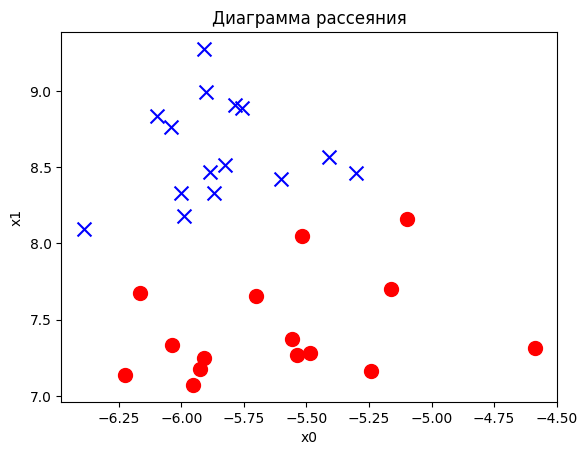

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel='linear', C=100) # высокое значение С задает жесткий зазор между классами
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

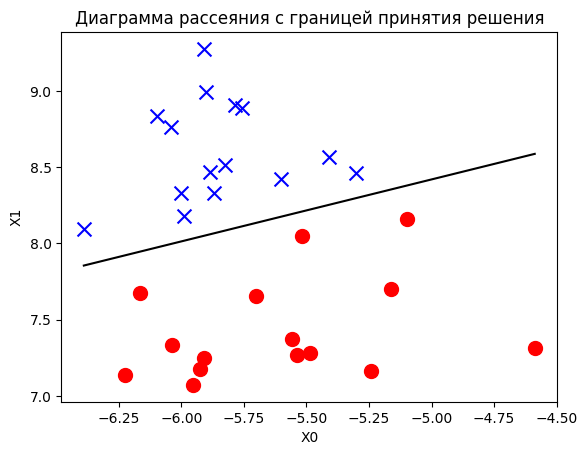

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Опорные вектора - наиболее близкие к другому классу точки.

In [ ]:
svm_linear.support_vectors_ # координаты опорных векторов

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_ # индексы опорных векторов в исходном наборе данных

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_ # количество опорных векторов

array([1, 2], dtype=int32)

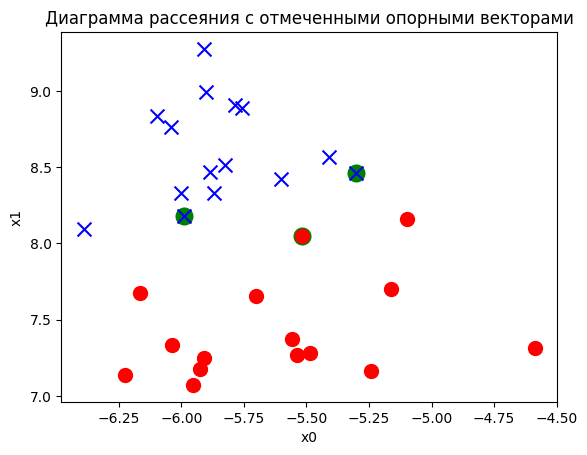

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

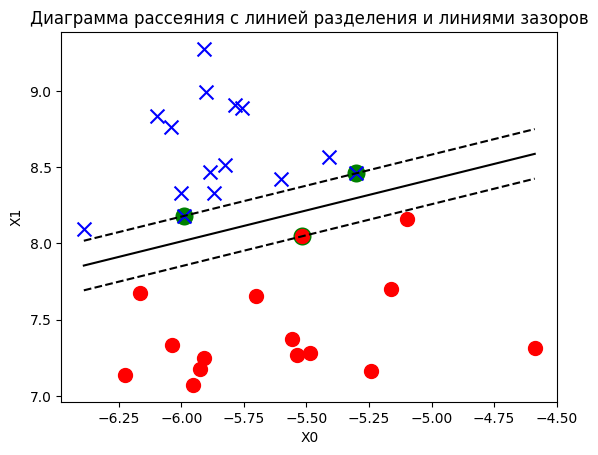

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

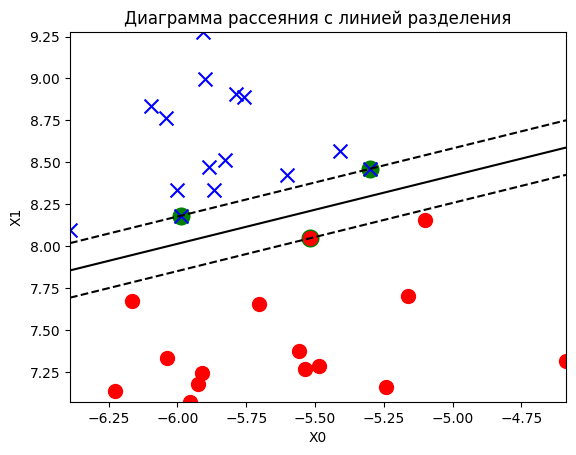

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

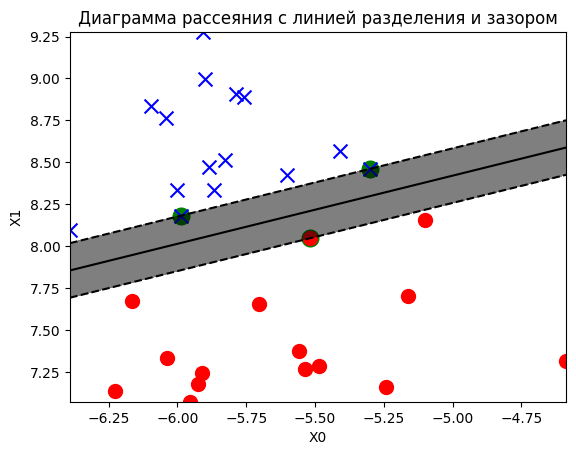

In [ ]:
plot_decision_regions(X, y, svm_linear)

In [ ]:
y_pred =  svm_linear.predict(X) # вектор предсказанных значений целевой переменной

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]] # новая точка данных

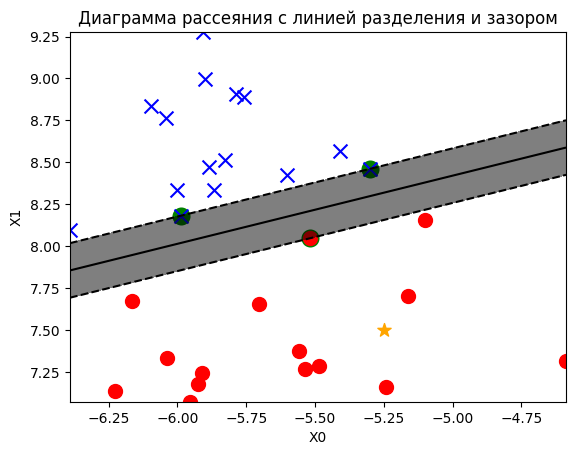

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

**Линейно неразделимые данные с зазором**

In [ ]:
from sklearn.datasets import make_circles

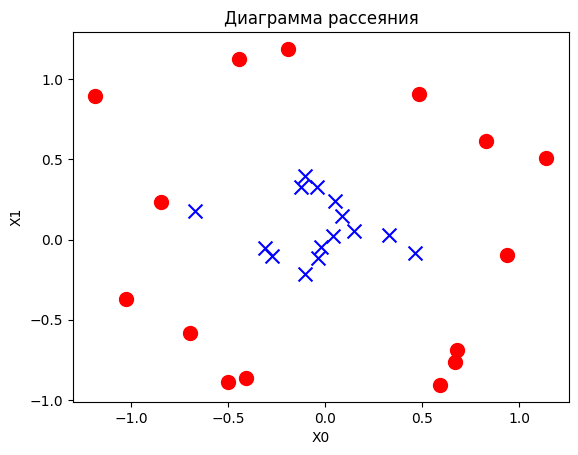

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
# 30 точек в выборке, случайность для воспроизводимости, внутренний круг в 10 раз меньше внешнего, шум к точкам (чтобы классы частично пересекались)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

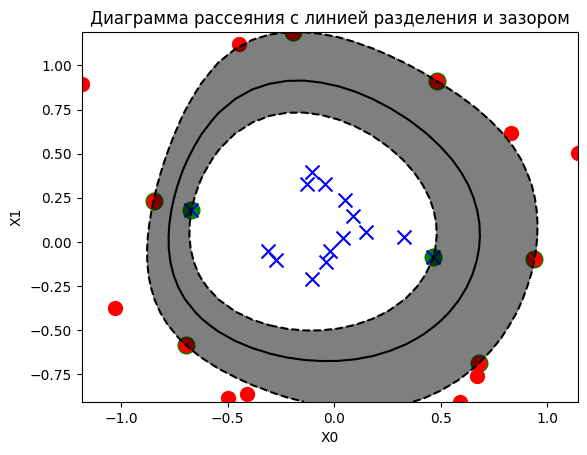

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.4666666666666667

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

Низкое качество классификации, точность низкая, матрица ошибок почти симметрична (модель путает классы одинаково часто).

**Данные без зазора**

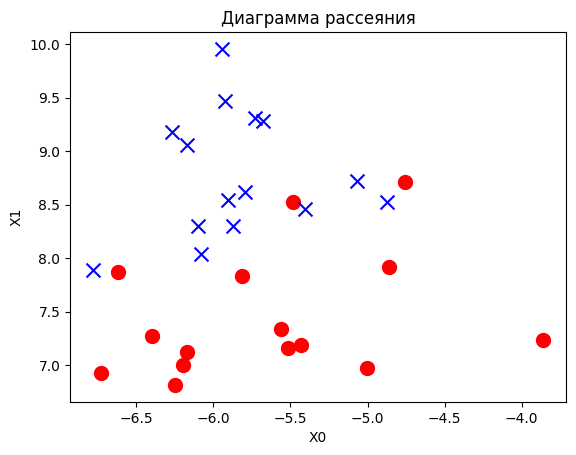

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y) # уменьшение параметра регуляризации С - мягкий зазор

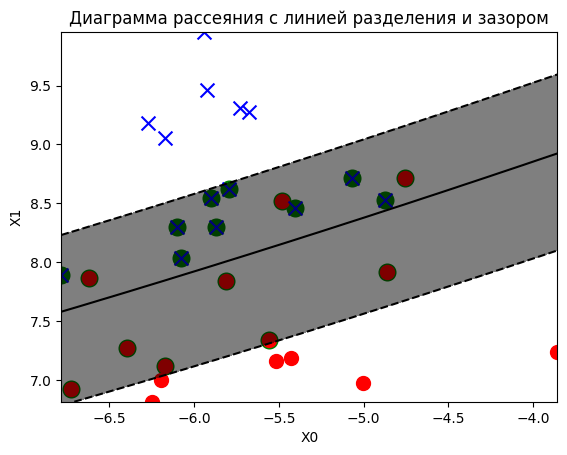

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Данная модель справляется с классификацией.

## Задания для самостоятельного выполнения

*1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.*

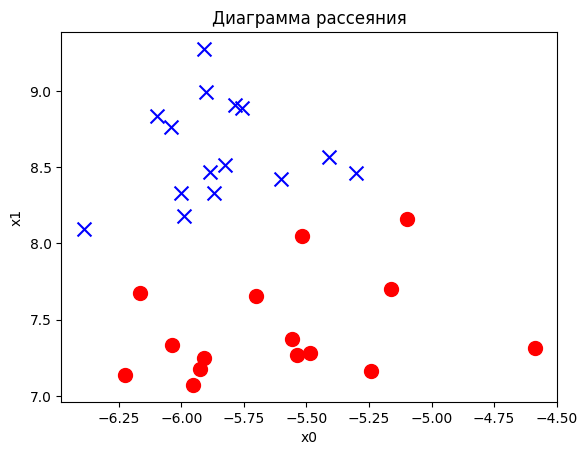

C: 0.01, Accuracy: 1.0000
C: 0.1, Accuracy: 0.9667
C: 1, Accuracy: 0.9667
C: 10, Accuracy: 1.0000
C: 100, Accuracy: 1.0000


In [595]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)


for i in range(len(accuracies)):
  print(f"C: {C_values[i]}, Accuracy: {accuracies[i]:.4f}")


Для линейно разделимых данных SVM с линейным ядром работает хорошо. При низких значениях точность чуть падает, но остается высокой, т.к. данные не сложны для разделения. Средние - небольшое снижение точности, возможно ухудшение баланса между ошибками и зазором. Высокие значения обеспечивают 100% точности.

*2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?*

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

Предсказание для точки класса 0 [[-6, 7]]: [0]


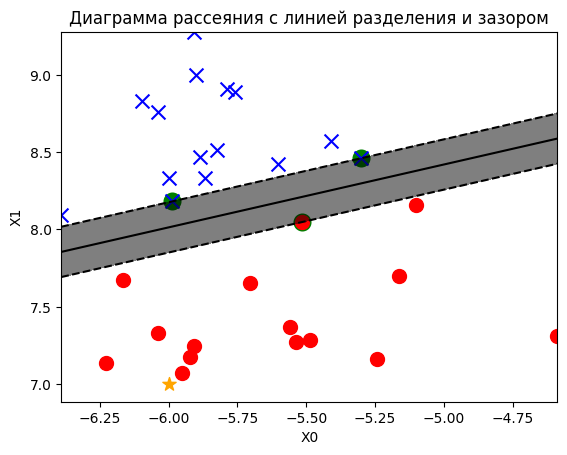

Предсказание для точки класса 1 [[-5, 9]]: [1]


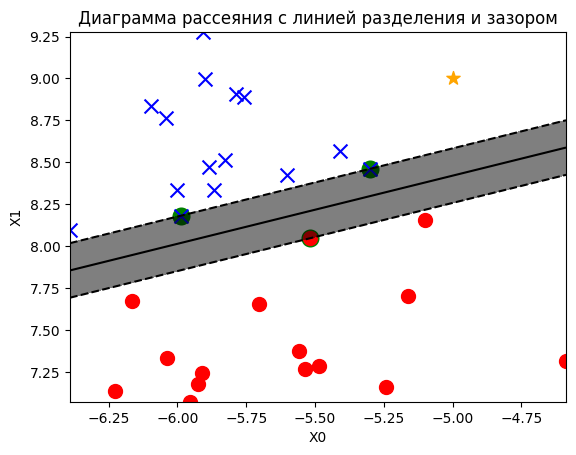

Предсказание для точки внутри зазора [[-6.25, 8]]: [1]


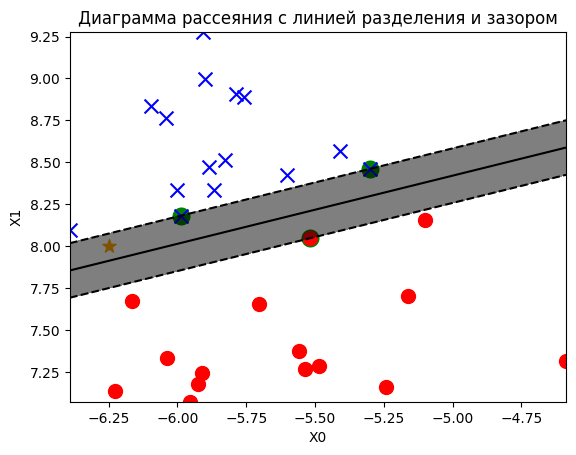

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


# точка - класс 0
observation_class_0 = [[-6, 7]]
prediction_class_0 = svm_linear.predict(observation_class_0)
print(f"Предсказание для точки класса 0 {observation_class_0}: {prediction_class_0}")
plt.scatter(observation_class_0[0][0], observation_class_0[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


# точка - класс 1
observation_class_1 = [[-5, 9]]
prediction_class_1 = svm_linear.predict(observation_class_1)
print(f"Предсказание для точки класса 1 {observation_class_1}: {prediction_class_1}")
plt.scatter(observation_class_1[0][0], observation_class_1[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

# точка внутри зазора
observation_class_2 = [[-6.25, 8]]
prediction_class_2 = svm_linear.predict(observation_class_2)
print(f"Предсказание для точки внутри зазора {observation_class_2}: {prediction_class_2}")
plt.scatter(observation_class_2[0][0], observation_class_2[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


*3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.*

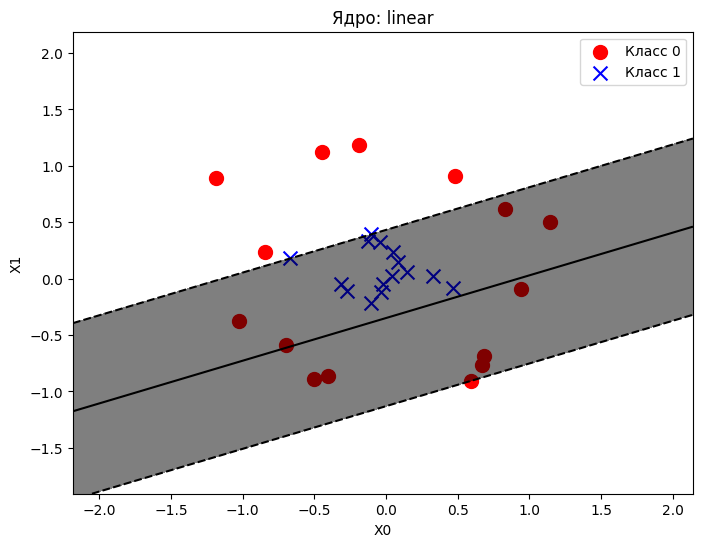

Точность для ядра linear: 0.7000


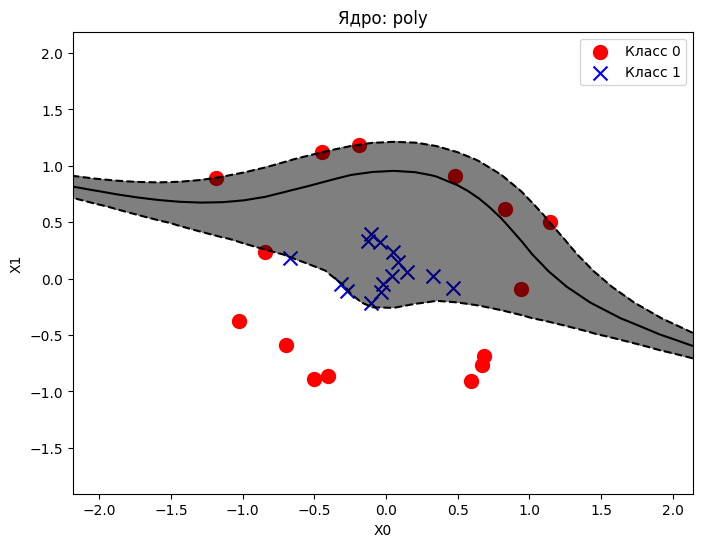

Точность для ядра poly: 0.7000


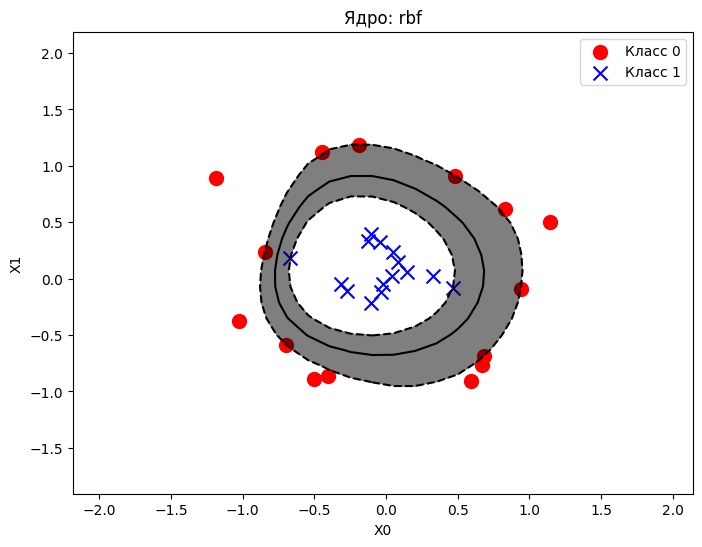

Точность для ядра rbf: 1.0000


In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)


# Ядро: linear
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: linear')
print(f"Точность для ядра linear: {accuracy:.4f}")


# Ядро: poly
svm_model = SVC(kernel='poly', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: poly')
print(f"Точность для ядра poly: {accuracy:.4f}")


# Ядро: rbf
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: rbf')
print(f"Точность для ядра rbf: {accuracy:.4f}")



*4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.*

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_poly = SVC(kernel='poly', degree=4, C=C)
    svm_poly.fit(X, y)

    y_pred = svm_poly.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)

    print(f"C: {C}, Accuracy: {acc:.4f}")


C: 0.01, Accuracy: 0.7667
C: 0.1, Accuracy: 0.7667
C: 1, Accuracy: 0.8000
C: 10, Accuracy: 0.9000
C: 100, Accuracy: 0.9000


*5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.*

Точность модели LinearSVC: 0.8000


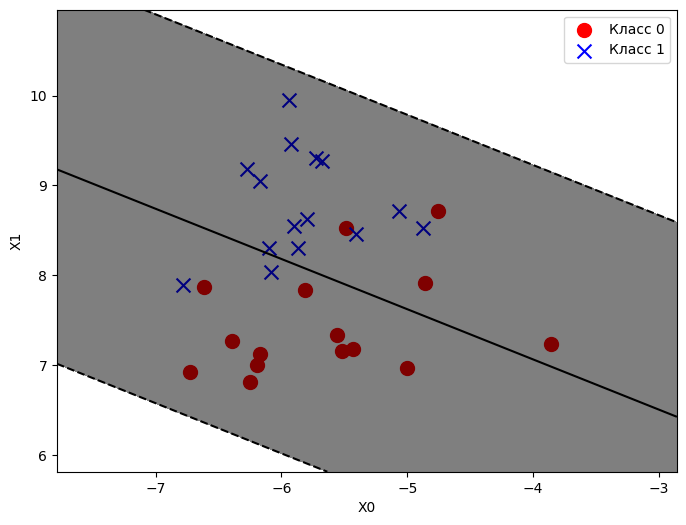

In [ ]:
from sklearn.svm import LinearSVC


linear_svc = LinearSVC(C=1, max_iter=10000)
linear_svc.fit(X, y)

y_pred = linear_svc.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Точность модели LinearSVC: {accuracy:.4f}")

plot_decision_regions(X, y, linear_svc)


*6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.*

In [ ]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C)
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)

        print(f"Ядро: {kernel}, C: {C}, Точность: {acc:.4f}")

        if acc > best_score:
            best_score = acc
            best_params = {'kernel': kernel, 'C': C}

print(f"\nЛучшее ядро: {best_params['kernel']}, Лучшее C: {best_params['C']}, Лучшая точность: {best_score:.4f}")


Ядро: linear, C: 0.01, Точность: 0.8630
Ядро: linear, C: 0.1, Точность: 0.8630
Ядро: linear, C: 1, Точность: 0.8630
Ядро: linear, C: 10, Точность: 0.8630
Ядро: linear, C: 100, Точность: 0.8630
Ядро: poly, C: 0.01, Точность: 0.7720
Ядро: poly, C: 0.1, Точность: 0.8490
Ядро: poly, C: 1, Точность: 0.8720
Ядро: poly, C: 10, Точность: 0.8660
Ядро: poly, C: 100, Точность: 0.8670
Ядро: rbf, C: 0.01, Точность: 0.8680
Ядро: rbf, C: 0.1, Точность: 0.8710
Ядро: rbf, C: 1, Точность: 0.8770
Ядро: rbf, C: 10, Точность: 0.8820
Ядро: rbf, C: 100, Точность: 0.9060

Лучшее ядро: rbf, Лучшее C: 100, Лучшая точность: 0.9060


*7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?*

In [592]:
def train_time(X, y, kernel, C):
    start_time = time.time()
    model = SVC(kernel=kernel, C=C)
    model.fit(X, y)
    end_time = time.time()
    return end_time - start_time


kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10, 100]

sizes = [100, 500, 1000, 5000, 10000]

for size in sizes:
    X, y = make_classification(n_samples=size, n_features=5, random_state=42)

    for kernel in kernels:
        for C in C_values:
            time_taken = train_time(X, y, kernel, C)
            print(f"Количество точек: {size}, Ядро: {kernel}, C: {C}, Время обучения: {time_taken:.4f} секунд")

    print()


Количество точек: 100, Ядро: linear, C: 0.01, Время обучения: 0.0025 секунд
Количество точек: 100, Ядро: linear, C: 0.1, Время обучения: 0.0018 секунд
Количество точек: 100, Ядро: linear, C: 1, Время обучения: 0.0017 секунд
Количество точек: 100, Ядро: linear, C: 10, Время обучения: 0.0030 секунд
Количество точек: 100, Ядро: linear, C: 100, Время обучения: 0.0030 секунд
Количество точек: 100, Ядро: poly, C: 0.01, Время обучения: 0.0023 секунд
Количество точек: 100, Ядро: poly, C: 0.1, Время обучения: 0.0022 секунд
Количество точек: 100, Ядро: poly, C: 1, Время обучения: 0.0018 секунд
Количество точек: 100, Ядро: poly, C: 10, Время обучения: 0.0018 секунд
Количество точек: 100, Ядро: poly, C: 100, Время обучения: 0.0015 секунд
Количество точек: 100, Ядро: rbf, C: 0.01, Время обучения: 0.0020 секунд
Количество точек: 100, Ядро: rbf, C: 0.1, Время обучения: 0.0019 секунд
Количество точек: 100, Ядро: rbf, C: 1, Время обучения: 0.0016 секунд
Количество точек: 100, Ядро: rbf, C: 10, Время об

*8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.*

In [610]:
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.contour(xx, yy, Z, levels=[0.5, 1.5, 2.5], colors='k', linestyles='--')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')

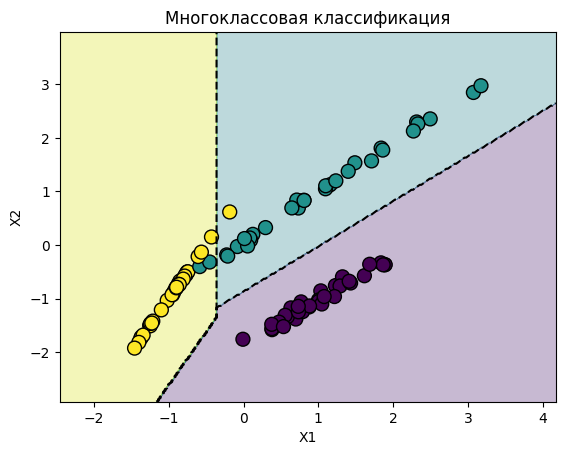

In [611]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1,
                            n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
# в наборе 100 точек, 2 признака, 3 класса в задаче классификации, 1 кластер для каждого класса, 2 информативных признака

svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X, y)

plot_decision_regions(X, y, svm)
plt.title("Многоклассовая классификация")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


*9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.*

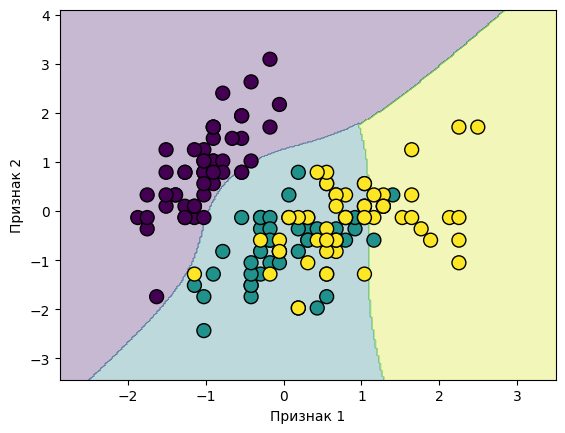

In [619]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


svm = SVC(kernel='poly')
svm.fit(X_scaled, y)


def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()


plot_decision_regions(X_scaled, y, svm)


*10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.*

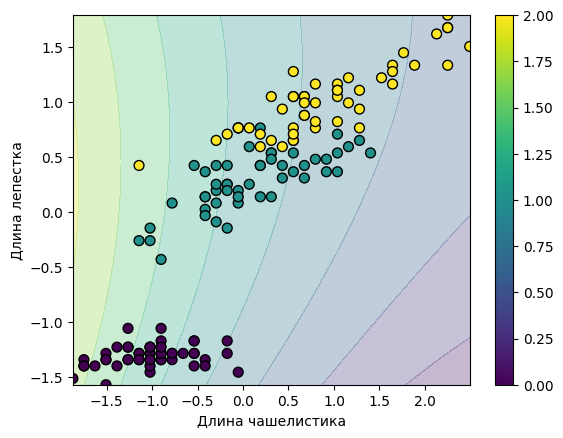

In [624]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # длина чашелистика и длина лепестка
y = iris.target  # метки классов как целевые переменные

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svr = SVR(kernel='poly')
svr.fit(X_scaled, y)


def plot_regression(X, y, model):
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 300)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 300)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    X_range = np.c_[X1.ravel(), X2.ravel()]
    X_range_scaled = scaler.transform(X_range)

    y_pred = model.predict(X_range_scaled)
    y_pred = y_pred.reshape(X1.shape)

    plt.contourf(X1, X2, y_pred, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap='viridis')
    plt.xlabel('Длина чашелистика')
    plt.ylabel('Длина лепестка')
    plt.colorbar()
    plt.show()


plot_regression(X_scaled, y, svr)
